In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [2]:
data=pd.read_csv("E:\\data science\\assiments\\5\\50_Startups.csv")

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Pairplot

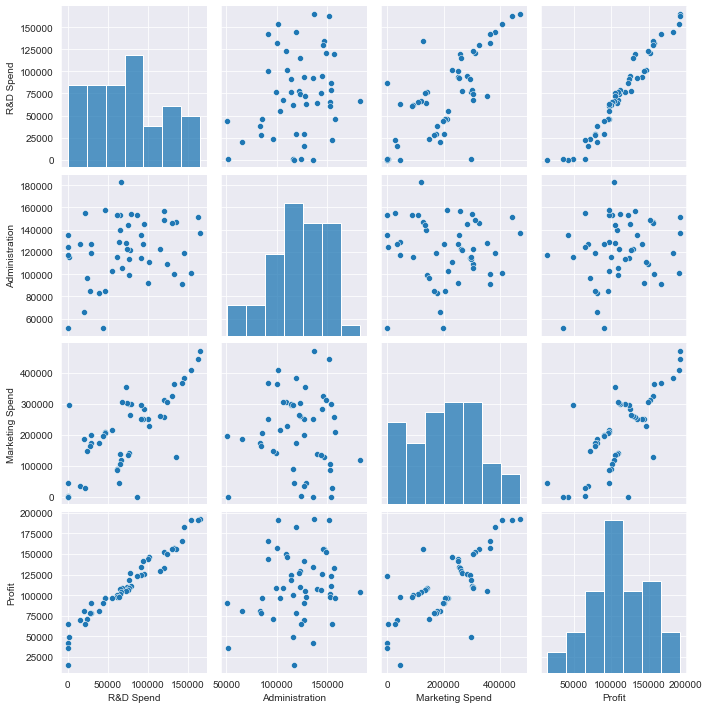

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

### Correlation Matrix

In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### EDA

In [7]:
data=data.drop('Administration',axis=1)

In [8]:
data = pd.get_dummies(data, columns=['State'])

In [9]:
data

,R&D Spend,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,471784.10,192261.83,0,0,1
1,162597.70,443898.53,191792.06,1,0,0
2,153441.51,407934.54,191050.39,0,1,0
3,144372.41,383199.62,182901.99,0,0,1
4,142107.34,366168.42,166187.94,0,1,0
5,131876.90,362861.36,156991.12,0,0,1
6,134615.46,127716.82,156122.51,1,0,0
7,130298.13,323876.68,155752.60,0,1,0
8,120542.52,311613.29,152211.77,0,0,1
9,123334.88,304981.62,149759.96,1,0,0


In [10]:
data=data.rename({'R&D Spend':'RDSpend','Marketing Spend':'MarketingSpend'},axis=1)

In [16]:
data=data.rename({'State_New York':'State_New_York'},axis=1)

### Model Building

In [17]:
model=smf.ols("Profit~RDSpend+MarketingSpend + State_California + State_Florida + State_New_York",data=data).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           9.72e-29
Time:                        01:20:55   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
RDSpend              0.7967      0.042     18.771      0.000       0.711       0.882
MarketingSpend       0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
State_Florida     1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
State_New_York    1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     5.09e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Cook's Distance

In [58]:
model_influence=model.get_influence()

In [59]:
(c,_)=model_influence.cooks_distance

In [60]:
c

array([1.81512394e-04, 2.17714151e-03, 3.85030256e-02, 2.97393985e-02,
       7.43914487e-03, 8.87288175e-03, 3.60799476e-03, 4.97976353e-03,
       2.01902031e-06, 4.00294501e-03, 1.64482064e-02, 1.07062146e-02,
       1.52583172e-02, 4.10195007e-03, 6.23696501e-02, 4.28041217e-02,
       1.08143179e-02, 3.37984862e-03, 2.70426509e-03, 5.18325214e-02,
       5.68610172e-04, 8.25784837e-03, 4.13103131e-03, 3.07888695e-04,
       2.54030757e-03, 2.87274239e-03, 4.56256249e-03, 3.76461096e-02,
       4.04646886e-06, 3.84226278e-04, 1.54537882e-04, 1.49920702e-04,
       7.91098475e-04, 7.81029691e-05, 6.23157729e-03, 6.50961158e-03,
       5.60674443e-02, 5.62367665e-04, 4.68122817e-02, 5.47791686e-04,
       2.06083678e-03, 2.68539324e-03, 3.32631540e-04, 2.55928157e-02,
       2.50014790e-05, 1.17553495e-01, 7.74416953e-02, 7.99827600e-03,
       5.61942095e-02, 3.89488623e-01])

### Influence Plot

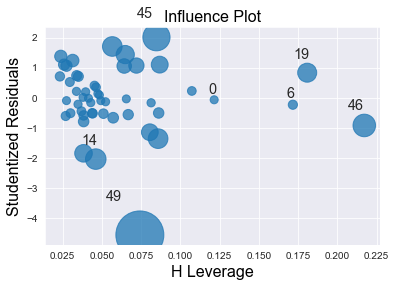

In [67]:
influence_plot(model)
plt.show()

Text(0, 0.5, 'cooks distance')

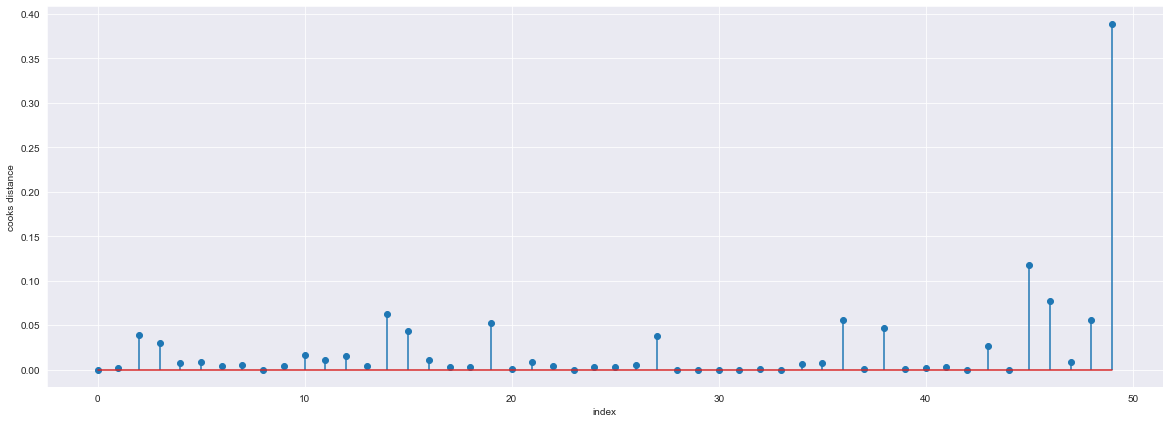

In [62]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("index")
plt.ylabel("cooks distance")

In [68]:
data.loc[c>0.5]

,RDSpend,MarketingSpend,State,Profit
49,0.0,45173.06,California,14681.4


In [69]:
data=data.drop((49),axis=0)

In [70]:
model2=smf.ols("Profit~RDSpend+MarketingSpend",data=data).fit()

In [72]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           3.74e-33
Time:                        02:40:30   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDSpend            0.7754      0.035     22.136      0.000       0.705       0.846
MarketingSpend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model2 is best because it have high R-squared:	0.961 

### Prediction and Mean of errors

In [73]:
pred=model2.predict(data)

In [74]:
pred

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64

In [75]:
actual=data.Profit

In [76]:
error=actual-pred

In [77]:
error.mean()

-2.1530894980746872e-11

In [78]:
errors=pd.DataFrame({"actual":actual,"prediction":pred,"errors":error})

In [79]:
errors

,actual,prediction,errors
0,192261.83,190942.726927,1319.103073
1,191792.06,188043.924520,3748.135480
2,191050.39,179957.312472,11093.077528
3,182901.99,172246.416164,10655.573836
4,166187.94,170022.687457,-3834.747457
5,156991.12,161999.405410,-5008.285410
6,156122.51,157669.178690,-1546.668690
7,155752.60,159705.298181,-3952.698181
8,152211.77,151804.380605,407.389395
9,149759.96,153787.521922,-4027.561922


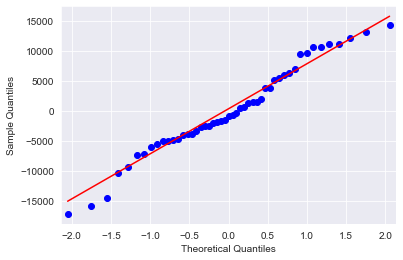

In [80]:
qqplot=sm.qqplot(errors.errors,line='q')

<AxesSubplot:>

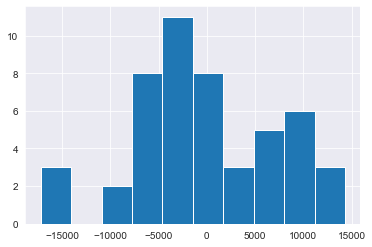

In [81]:
errors.errors.hist()

Text(0, 0.5, 'standardised residual value')

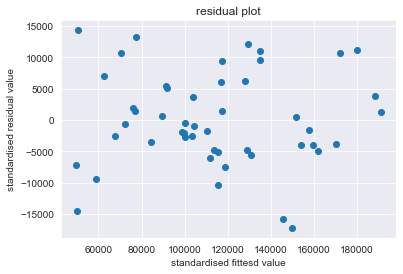

In [82]:
plt.scatter(pred,error)
plt.title("residual plot")
plt.xlabel("standardised fittesd value")
plt.ylabel("standardised residual value")

### Model2 is best as it has best R-squared:	0.961

### Prediction for new data

In [87]:
newdata=pd.DataFrame({"RDSpend":124000,'MarketingSpend':432551},index=[1])

In [88]:
newdata

,RDSpend,MarketingSpend
1,124000,432551


In [89]:
model2.predict(newdata)

1    157804.452003
dtype: float64